$$\text{Applied Machine Learning in Python}$$
$$\text{week 4}$$

* Colaboratory (IPython online notebook)
    * Introduction and demonstration
    * Tutorial
    * **amlip2018@gmail.com**
* Clustering:
    * k-means (recap)
    * Elbow method
    * Silhouette plot
    * DBSCAN clustering
* Regression analysis
    * Linear
    * Polynomial
    * Evaluation


$$\text{Colaboratory}$$

<img src="plots/colab_0.png"  align="center" style="width: 800px;"/>

https://research.google.com/colaboratory/unregistered.html

$$\text{Clustering}$$


k-means:

In [13]:
# standard input
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import cluster
from sklearn import datasets
from sklearn import metrics

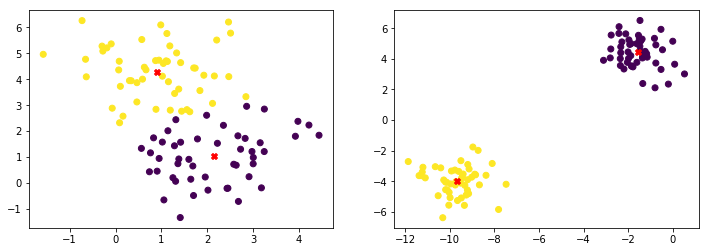

In [19]:
# making data
X_0, y_0 = datasets.make_blobs(n_features=2, n_samples=100, centers=2, random_state=0)
X_1, y_1 = datasets.make_blobs(n_features=2, n_samples=100, centers=2, random_state=1)
# fitting data
n_clusters = 2
km_0 = cluster.KMeans(n_clusters=n_clusters).fit(X_0)
km_1 = cluster.KMeans(n_clusters=n_clusters).fit(X_1)
# visualisation
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_0[:,0], X_0[:,1], c=km_0.labels_)
plt.scatter(km_0.cluster_centers_[:,0], km_0.cluster_centers_[:,1], marker='X', c='r')
plt.subplot(122)
plt.scatter(X_1[:,0], X_1[:,1], c=km_1.labels_)
plt.scatter(km_1.cluster_centers_[:,0], km_1.cluster_centers_[:,1], marker='X', c='r')
plt.show()

$$\textbf{How to find the number of clusters?}$$

**Elbow method**

Measuring the **cluster inertia** (within-cluster sum of squared errors (**SSE**)):
$$\text{SSE} = \sum_{i=1}^n\sum_{j=1}^k C_{ij}|\textbf{x}_i - \mu_j|^2$$

where ${\mu_j}$ is the position of a centroid of a cluster $j$ and $C_{ij} = \left\{
    \begin{array}{l}
      1, \text{if the sample } x_i \text{ in cluster j}\\
      0, \text{otherwise}
    \end{array}
  \right.
$

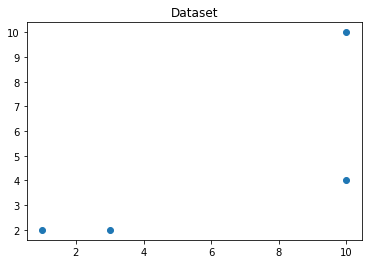

In [242]:
x1 = np.array([1, 3, 10, 10])
x2 = np.array([2, 2, 4, 10])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2) 
plt.plot()
plt.title('Dataset')
plt.scatter(X[:,0], X[:,1])
plt.show()

In [243]:
# fit
km_new = cluster.KMeans(n_clusters=2)
km_new.fit(X);

In [244]:
# print centroids
km_new.cluster_centers_

array([[  2.,   2.],
       [ 10.,   7.]])

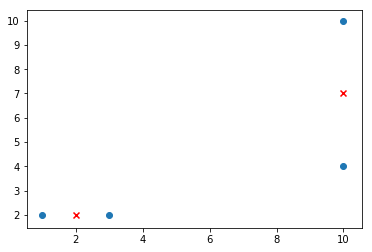

In [245]:
# plot
plt.scatter(X[:,0], X[:,1])
plt.scatter(km_new.cluster_centers_[:,0], km_new.cluster_centers_[:,1], c='r', marker='x')
plt.show()

In [246]:
# compute the total inertia (SSE)
km_new.inertia_

20.0

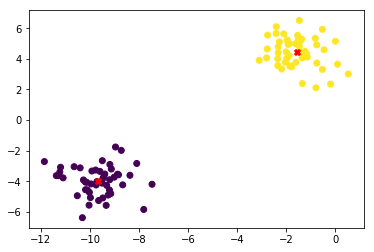

In [247]:
# making data
X_1, y_1 = datasets.make_blobs(n_features=2, n_samples=100, centers=2, random_state=1)
# fitting data
n_clusters = 2
km_1 = cluster.KMeans(n_clusters=n_clusters).fit(X_1)
# visualisation
plt.scatter(X_1[:,0], X_1[:,1], c=km_1.labels_)
plt.scatter(km_1.cluster_centers_[:,0], km_1.cluster_centers_[:,1], marker='X', c='r')
plt.show()

In [258]:
# compute SSE scores for several values of k:
sse_k = []
k_values = [1,2,3,4,5]
for k_i in k_values:
    # fit with new value of k
    km_1 = cluster.KMeans(n_clusters=k_i).fit(X_1)
    sse_k.append(km_1.inertia_)
sse_k

[2743.421435777213,
 916.88695589090287,
 499.22058758788262,
 339.09572554086827,
 220.65324423714989]

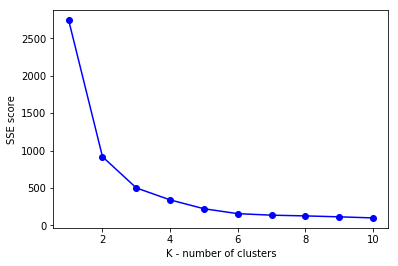

In [249]:
# plot SSE scores
plt.plot(k_values, sse_k, 'bo-')
plt.xlabel('K - number of clusters')
plt.ylabel('SSE score')
plt.show()

**Elbow** is at **k = 2**, which could potentially be the number of clusters

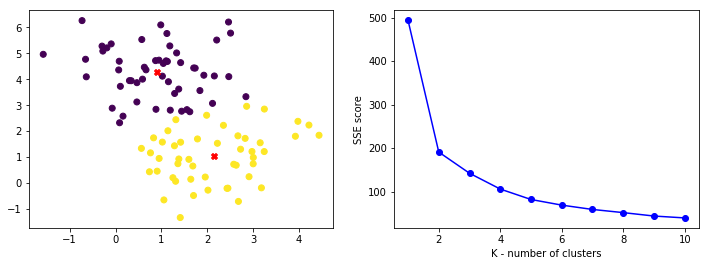

[493.80310804578238, 190.86228627180594, 142.1975302211182, 105.85757531702484, 81.886234334757788, 68.935954215849023, 58.994321484946937, 51.71031450778414, 43.851862651914715, 39.530748933149511]


In [411]:
n_clusters = 2
X_1, y_1 = datasets.make_blobs(n_features=2, n_samples=100, centers=n_clusters, random_state=0)
km_1 = cluster.KMeans(n_clusters=n_clusters).fit(X_1)
sse_k = []
k_values = [1,2,3,4,5,6,7,8,9,10]
for k_i in k_values:
    # fit with new value of k
    km_tmp = cluster.KMeans(n_clusters=k_i).fit(X_1)
    sse_k.append(km_tmp.inertia_)
plt.figure(figsize=(12,4)); plt.subplot(121);plt.scatter(X_1[:,0], X_1[:,1], c=km_1.labels_)
plt.scatter(km_1.cluster_centers_[:,0], km_1.cluster_centers_[:,1], marker='X', c='r')
plt.subplot(122);plt.plot(k_values, sse_k, 'bo-');plt.xlabel('K - number of clusters');plt.ylabel('SSE score')
plt.show()
print(sse_k)

$$\textbf{Silhouette plot}$$

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

**Silhouette coefficient**
Assume the data have been clustered via any technique, into _k_ clusters. For each point **i**, let **$a_i$** be the average distance of **i** with all other data within the same cluster. We can interpret **$a_i$** as how well **i** is assigned to its cluster (the smaller the value, the better the assignment). We then define the average dissimilarity of point **i** to a cluster **C** as the average of the distance from **i** to all points in **C**.

Let **$b_i$** be the lowest average distance of **i** to all points in any other cluster, of which **i** is not a member. The cluster with this lowest average dissimilarity is said to be the "neighbouring cluster" of **i** because it is the next best fit cluster for point **i**. We now define a silhouette:

$$s_i = \frac{b_i - a_i}{max\{b_i, a_i\}}$$

where $-1 \leq s_i \leq 1$


**Intuition of Silhouette analysis**

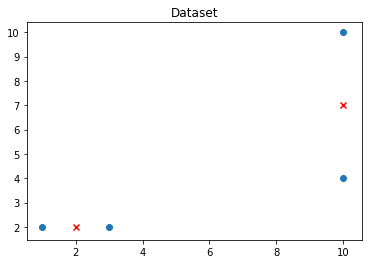

In [382]:
x1 = np.array([1, 3, 10, 10]);x2 = np.array([2, 2, 4, 10])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2) 
# fit clustering algorithm
km_new = cluster.KMeans(n_clusters=2).fit(X);
plt.plot();plt.title('Dataset');plt.scatter(X[:,0], X[:,1]);plt.scatter(km_new.cluster_centers_[:,0], km_new.cluster_centers_[:,1],c='r', marker='x');plt.show()

In [393]:
from sklearn import metrics
# compute silhouette scores
s_i = metrics.silhouette_samples(X=X, labels=km_new.predict(X), metric='euclidean')
s_score = metrics.silhouette_score(X=X, labels=km_new.predict(X), metric='euclidean')
print(s_i)
print(s_score)

[ 0.81186333  0.77666427  0.27271204  0.47070671]
0.582986586682


In [265]:
# visualisation of silhouette plot- utility function
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from __future__ import print_function
'''
X, y_o = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility
'''
#range_n_clusters = [2, 3, 4, 5, 6]

def plot_silhouette_plot(X_in, n_clust):
    for n_clusters in n_clust:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X_in) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = cluster.KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X_in)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = metrics.silhouette_score(X_in, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = metrics.silhouette_samples(X_in, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X_in[:, 0], X_in[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        plt.show()

**Silhouette plot**

In [387]:
X_1, y_1 = datasets.make_blobs(n_features=2, n_samples=100, centers=2, random_state=0)

For n_clusters = 2 The average silhouette_score is : 0.863813619709


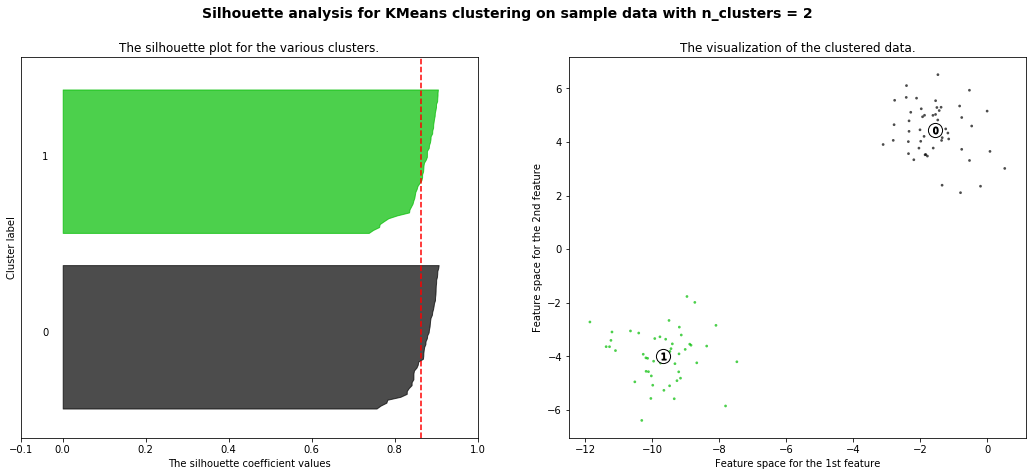

In [417]:
plot_silhouette_plot(X_in=X_1, n_clust=[2])

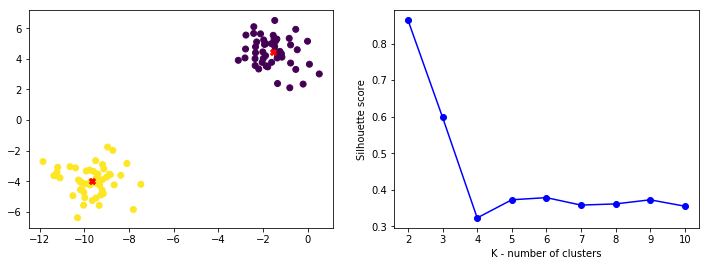

[0.86381361970942305, 0.59793556648207802, 0.32312657307808601, 0.37273031909239068, 0.37861436167925766, 0.35822649891112429, 0.3614290073628148, 0.37263493542445308, 0.35524910569974461]


In [412]:
n_clusters = 2
X_1, y_1 = datasets.make_blobs(n_features=2, n_samples=100, centers=n_clusters, random_state=1)
km_1 = cluster.KMeans(n_clusters=n_clusters).fit(X_1)
sil_score_k = []
k_values = [2,3,4,5,6,7,8,9,10]
for k_i in k_values:
    # fit with new value of k
    km_tmp = cluster.KMeans(n_clusters=k_i).fit(X_1)
    s_tot_k = metrics.silhouette_score(X=X_1, labels=km_tmp.predict(X_1), metric='euclidean')
    sil_score_k.append(s_tot_k)
plt.figure(figsize=(12,4)); plt.subplot(121);plt.scatter(X_1[:,0], X_1[:,1], c=km_1.labels_)
plt.scatter(km_1.cluster_centers_[:,0], km_1.cluster_centers_[:,1], marker='X', c='r')
plt.subplot(122);plt.plot(k_values, sil_score_k, 'bo-');plt.xlabel('K - number of clusters');plt.ylabel('Silhouette score')
plt.show()
print(sil_score_k)

$$\textbf{DBSCAN}$$
$$\text{Density-Based Spatial Clustering of Applications with Noise}$$

DBSCAN is a density-based clustering algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away).

Consider a set of points in some space to be clustered. For the purpose of DBSCAN clustering, the points are classified as core points, (density-)reachable points and outliers, as follows:

* A point **p** is a core point if at least **minPts** points are within distance **ε** (ε is the maximum radius of the neighborhood from p) of it (including p). Those points are said to be directly reachable from **p**.
* A point **q** is directly reachable from **p** if point **q** is within distance **ε** from point **p** and **p** must be a core point.
* A point **q** is reachable from **p** if there is a path p1, ..., pn with p1 = p and pn = q, where each pi+1 is directly reachable from pi (all the points on the path must be core points, with the possible exception of q).
* All points not reachable from any other point are outliers.

Now if **p** is a core point, then it forms a cluster together with all points (core or non-core) that are reachable from it. Each cluster contains at least one core point; non-core points can be part of a cluster, but they form its "edge", since they cannot be used to reach more points

In this diagram, **minPts = 4**. Point **A** and the other red points are core points, because the area surrounding these points in an **ε** radius contain at least **4** points (including the point itself). Because they are all reachable from one another, they form a single cluster. Points **B** and **C** are not core points, but are reachable from **A** (via other core points) and thus belong to the cluster as well. Point **N** is a noise point that is neither a core point nor directly-reachable.

<img src="plots/dbscan_0.png"  align="center" style="width: 600px;"/>

In [367]:
# half moons
X_moon, y_moon = datasets.make_moons(n_samples=100, noise=0.05, random_state=1)
# k-means
km_1_moon = cluster.KMeans(n_clusters=2).fit(X_moon)
# DBSCAN
dbscan_moon = cluster.DBSCAN(eps=0.2, min_samples=2, metric='euclidean').fit(X_moon)

In [ ]:
# plot results
plt.figure(figsize=(12,4)); plt.subplot(121);
plt.scatter(X_moon[:,0], X_moon[:,1], c=km_1_moon.labels_)
plt.scatter(km_1_moon.cluster_centers_[:,0], km_1_moon.cluster_centers_[:,1],c='r', marker='x')
plt.subplot(122);
plt.scatter(X_moon[:,0], X_moon[:,1], c=dbscan_moon.labels_)
plt.show()

$$\textbf{Regression Analysis}$$

The following are a set of methods intended for regression in which the target value is expected to be a linear combination of the input variables. In mathematical notion, if $\hat{y}$ is the predicted value:
$$\hat{y}(\vec{w}, \vec{x}) = w_0 + w_1 x_1 + w_2 x_2 + ...$$

where $\{x_1, x_2, ...\}$ are data points, $\{w_1, w_2, ...\}$ are coefficients and $w_0$ is intercept.

**LinearRegression** fits a linear model with coefficients $w = (w_1, ..., w_p)$ to minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation. Mathematically it solves a problem of the form: $$min_w||X w - y||^2$$

<img src="plots/lin_reg.png"  align="center" style="width: 600px;"/>

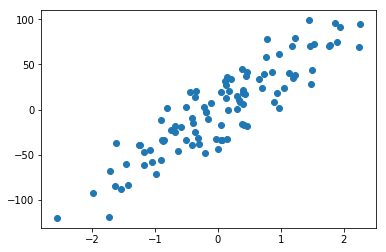

In [437]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
X_reg, y_reg = datasets.make_regression(n_features=1, n_samples=100, n_targets=1, noise=20, random_state=0)
plt.scatter(X_reg, y_reg)
plt.show()


In [438]:
# fitting
reg.fit(X_reg,y_reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

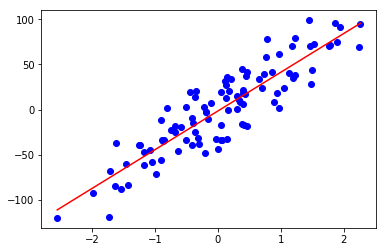

In [444]:
X_data = np.linspace(min(X_reg), max(X_reg), 100)
X_data
plt.scatter(X_reg, y_reg,c='b')
plt.plot(X_data, reg.predict(X_data.reshape((-1,1))),'r-')
plt.plot()
plt.show()

**Example**

In [448]:
# load data set
boston_d = datasets.load_boston()
X_b, y_b = boston_d.data, boston_d.target

In [451]:
df_boston = pd.DataFrame(data=X_b, columns=boston_d.feature_names)
df_boston['y'] = y_b
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [454]:
# regression
reg.fit(df_boston[boston_d.feature_names], df_boston['y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [459]:
# correlation analysis
corr_coef = np.corrcoef(df_boston[boston_d.feature_names].T)
pd.DataFrame(corr_coef)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220
1,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
2,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
3,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
4,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
5,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
6,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
7,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
8,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
9,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


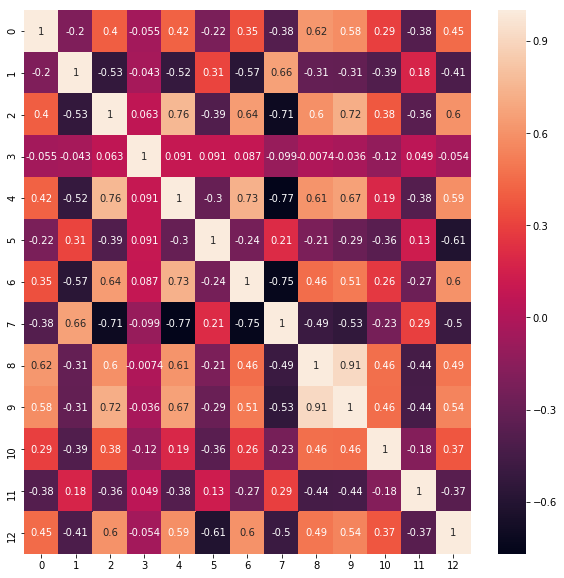

In [465]:
import seaborn as sns
plt.figure(figsize=(10,10))
hm = sns.heatmap(corr_coef, annot=True)
plt.show()